In [25]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import preprocessing, feature_selection, pipeline, linear_model, manifold, model_selection, neural_network

In [14]:
import pandas
from Bio import SeqIO

targets = './beta_glu_DMS_log2enrichment_melted.csv'

tar = pandas.read_csv(targets, index_col=0)
tar.head()

,value
M1A,NaN
V2A,-0.162
P3A,-0.800
A4A,0.002
A5A,0.002


In [15]:
for record in SeqIO.parse('data_set_protein_sequence.fa', 'fasta'):
    seq = record.seq

In [16]:
def mymap(n):
    
    design = n[-2]
    pos = int(n[1:-2]) - 1 
    native = seq[pos]
    
    return '{}{}{}'.format(native, pos+1, design) 

mymap('X1A\n')

'M1A'

In [17]:
feat = pandas.read_hdf('../rosetta_runs/bgl3/enzyme_design/features__enzyme_design.h5') 
feat.index = feat.index.map(mymap)
feat.head()

,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
M1A,-802.811,347.424,-88.863,0.0,0.600,0.587,181.9,436.5,258.2,3.450,...,0.681,480.0,-3.064,3.268,-1.546,0.013,-6.125,0.929,4.1,0.6
M1R,-806.726,347.130,-88.828,0.0,0.601,0.587,181.5,435.6,260.5,3.450,...,0.763,480.0,-3.282,3.046,-1.616,0.019,-6.561,0.923,3.8,0.3
M1N,-807.001,348.401,-88.521,0.0,0.594,0.589,179.4,437.0,260.1,3.434,...,0.706,480.0,-2.944,3.380,-1.676,0.023,-5.887,0.923,3.8,0.4
M1D,-807.996,345.115,-88.730,0.0,0.596,0.590,181.7,436.0,259.5,3.426,...,0.650,480.0,-3.476,2.918,-1.592,0.026,-6.949,0.925,4.2,0.5
M1C,-806.420,346.977,-88.686,0.0,0.596,0.587,180.5,436.4,259.5,3.442,...,0.718,480.0,-2.825,3.307,-1.495,0.018,-5.652,0.924,3.6,0.3


In [18]:
df = tar.join(feat).dropna()
df.shape

(3336, 60)

In [19]:
df.head()

,value,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
V2A,-0.162,-805.413,345.875,-88.020,0.0,0.595,0.587,183.4,435.8,259.5,...,0.763,480.0,-2.918,2.930,-1.351,0.018,-5.831,0.924,3.3,0.8
P3A,-0.800,-806.785,344.364,-88.192,0.0,0.592,0.588,182.3,436.1,260.1,...,0.662,480.0,-3.202,2.776,-1.345,0.020,-6.402,0.929,3.8,0.5
A4A,0.002,-806.451,344.893,-88.225,0.0,0.597,0.589,181.0,436.1,260.7,...,0.723,480.0,-3.257,2.852,-1.449,0.023,-6.515,0.926,3.8,0.3
A5A,0.002,-808.601,347.359,-88.490,0.0,0.594,0.586,181.4,436.5,259.8,...,0.728,480.0,-3.029,3.336,-1.613,0.015,-6.058,0.924,3.8,0.1
T8A,-0.012,-809.218,345.550,-89.054,0.0,0.591,0.585,180.8,436.6,260.4,...,0.636,480.0,-3.239,3.170,-1.684,0.022,-6.476,0.925,4.0,0.3


In [28]:
scaler = preprocessing.StandardScaler()

In [29]:
X = scaler.fit_transform(df.ix[:,1:])
y = df.ix[:,0]

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


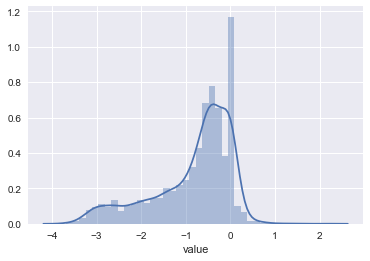

In [30]:
sns.distplot(y)

In [31]:
# correlations 

c = df.corr()[['value']]
c['abs'] = c.value.map(abs)
c.sort_values('abs', ascending=False)

,value,abs
value,1.000000,1.000000
SR_2_fa_rep,0.041540,0.041540
SR_4_all_cst,0.035033,0.035033
SR_4_hbond_sc,-0.032106,0.032106
total_score,-0.031768,0.031768
SR_4_nlpstat_pm,-0.030194,0.030194
SR_1_nlpstat_pm,-0.029404,0.029404
SR_3_nlpstat_pm,-0.029404,0.029404
SR_4_total_score,-0.026282,0.026282
SR_5_hbond_pm,0.025852,0.025852


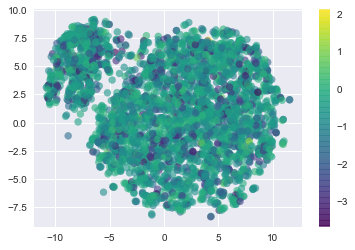

In [32]:
# t-SNE

tsne = manifold.TSNE()
X_ = tsne.fit_transform(X)
plt.scatter(X_[:,0], X_[:,1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar()